# Kaggle's Housing Prices: Advanced Regressions Techniques challege

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [28]:
%matplotlib inline

from collections import Counter
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
pd.options.display.max_columns = 100

In [60]:
df = pd.read_csv("data/train.csv")

In [61]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

### Fill in missing data

What relationships exist that could inform us better of LotFrontage?

(0, 20000)

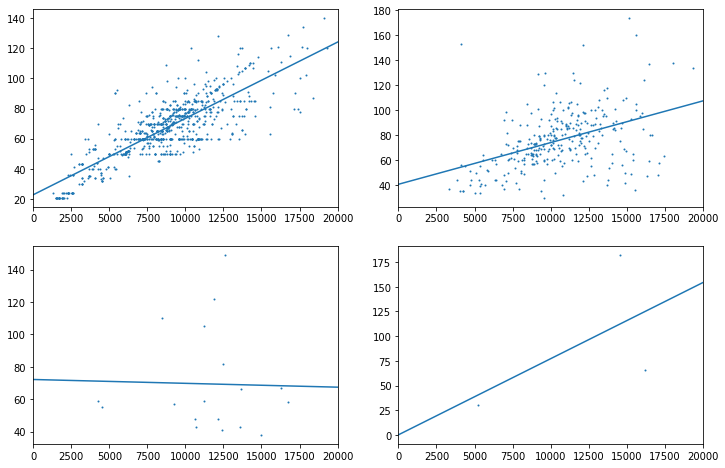

In [63]:
f = plt.figure(figsize=(12,8))

f.add_subplot(221)
df2 = df[(~pd.isnull(df.LotFrontage)) & (df.LotArea < 20000) & (df.LotShape == "Reg")]
popt, pcov = curve_fit(lambda x, m, b: m*x + b,
                       df2.LotArea,
                       df2.LotFrontage
                      )
plt.scatter(df2.LotArea, df2.LotFrontage, s=1)
plt.plot(np.linspace(0, 20000, 1000), popt[0]*np.linspace(0, 20000, 1000) + popt[1])
plt.xlim(0, 20000)

f.add_subplot(222)
df2 = df[(~pd.isnull(df.LotFrontage)) & (df.LotArea < 20000) & (df.LotShape == "IR1")]
popt, pcov = curve_fit(lambda x, m, b: m*x + b,
                       df2.LotArea,
                       df2.LotFrontage
                      )
plt.scatter(df2.LotArea, df2.LotFrontage, s=1)
plt.plot(np.linspace(0, 20000, 1000), popt[0]*np.linspace(0, 20000, 1000) + popt[1])
plt.xlim(0, 20000)

f.add_subplot(223)
df2 = df[(~pd.isnull(df.LotFrontage)) & (df.LotArea < 20000) & (df.LotShape == "IR2")]
popt, pcov = curve_fit(lambda x, m, b: m*x + b,
                       df2.LotArea,
                       df2.LotFrontage
                      )
plt.scatter(df2.LotArea, df2.LotFrontage, s=1)
plt.plot(np.linspace(0, 20000, 1000), popt[0]*np.linspace(0, 20000, 1000) + popt[1])
plt.xlim(0, 20000)

f.add_subplot(224)
df2 = df[(~pd.isnull(df.LotFrontage)) & (df.LotArea < 20000) & (df.LotShape == "IR3")]
popt, pcov = curve_fit(lambda x, m, b: m*x + b,
                       df2.LotArea,
                       df2.LotFrontage
                      )
plt.scatter(df2.LotArea, df2.LotFrontage, s=1)
plt.plot(np.linspace(0, 20000, 1000), popt[0]*np.linspace(0, 20000, 1000) + popt[1])
plt.xlim(0, 20000)

Perhaps, if just for now, we'll use the linear regression if the lot is regular, and if it's any type of irregular, we'll just use the mean of all irregular lots.

In [64]:
irr_mean = np.mean(df[df.LotShape.isin(["IR1", "IR2", "IR3"])].LotFrontage.dropna())
df.LotFrontage = df.apply(lambda row: irr_mean if (pd.isnull(row.LotFrontage) & (row.LotShape in ["IR1", "IR2", "IR3"])) else row.LotFrontage, axis=1)
df2 = df[(~pd.isnull(df.LotFrontage)) & (df.LotArea < 20000) & (df.LotShape == "Reg")]
popt, pcov = curve_fit(lambda x, m, b: m*x + b,
                       df2.LotArea,
                       df2.LotFrontage
                      )
df.LotFrontage = df.apply(lambda row: popt[0]*row.LotArea + popt[1] if (pd.isnull(row.LotFrontage) & (row.LotShape == "Reg")) else row.LotFrontage, axis=1)

Convert NaN's in Alley to "None"

In [65]:
df["Alley"].fillna("None", inplace=True)

What about MasVnrType? Does it seem to come in common combinations with other exterior data?

In [66]:
sorted(list(Counter(df.apply(lambda row: (row["Exterior1st"], row["Exterior2nd"], row["MasVnrType"]), axis=1)).items()),
       key=itemgetter(1),
       reverse=True
       )[:50]

[(('VinylSd', 'VinylSd', 'None'), 234),
 (('VinylSd', 'VinylSd', 'BrkFace'), 176),
 (('MetalSd', 'MetalSd', 'None'), 150),
 (('Wd Sdng', 'Wd Sdng', 'None'), 140),
 (('HdBoard', 'HdBoard', 'BrkFace'), 99),
 (('VinylSd', 'VinylSd', 'Stone'), 85),
 (('HdBoard', 'HdBoard', 'None'), 84),
 (('MetalSd', 'MetalSd', 'BrkFace'), 55),
 (('Plywood', 'Plywood', 'None'), 51),
 (('Plywood', 'Plywood', 'BrkFace'), 41),
 (('Wd Sdng', 'Wd Sdng', 'BrkFace'), 32),
 (('CemntBd', 'CmentBd', 'None'), 29),
 (('BrkFace', 'BrkFace', 'None'), 24),
 (('CemntBd', 'CmentBd', 'Stone'), 17),
 (('HdBoard', 'Plywood', 'None'), 15),
 (('Stucco', 'Stucco', 'None'), 15),
 (('AsbShng', 'AsbShng', 'None'), 15),
 (('WdShing', 'Wd Shng', 'None'), 13),
 (('BrkFace', 'Wd Sdng', 'None'), 12),
 (('CemntBd', 'CmentBd', 'BrkFace'), 11),
 (('Wd Sdng', 'Wd Shng', 'None'), 8),
 (('HdBoard', 'Plywood', 'BrkFace'), 8),
 (('HdBoard', 'HdBoard', 'Stone'), 7),
 (('Wd Sdng', 'Plywood', 'None'), 7),
 (('BrkFace', 'Plywood', 'None'), 5),
 (('

Looks like it wouldn't be crazy to assume None for all the missing values here...

In [67]:
df["MasVnrType"].fillna("None", inplace=True)

Next is MsnVnrArea. Maybe check if first floor square footage is useful.

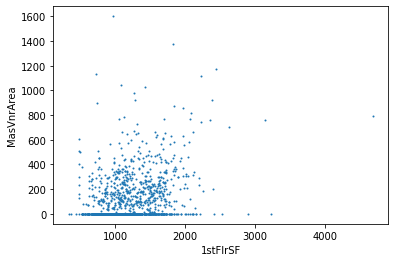

In [68]:
df.plot(x="1stFlrSF", y="MasVnrArea", kind="scatter", s=1)

Not so much. Let's just go with 0 for now. It's only 8 rows.

In [69]:
df["MasVnrArea"].fillna(0, inplace=True)

Fireplace quality - are all of the missing values because there are no fireplaces?

In [70]:
set(df[pd.isnull(df.FireplaceQu)].Fireplaces)

{0}

Yup. Let's go with "None" to de-nullify them.

In [71]:
df["FireplaceQu"].fillna("None", inplace=True)

What about BsmtQual? Is it mostly / all houses without basements?

In [72]:
sum(df[pd.isnull(df.BsmtQual)].TotalBsmtSF)

0

Yup. "None" it is.  Also likely true for all of the other missing basement attributes.

In [73]:
df["BsmtQual"].fillna("None", inplace=True)
df["BsmtCond"].fillna("None", inplace=True)
df["BsmtExposure"].fillna("None", inplace=True)
df["BsmtFinType1"].fillna("None", inplace=True)
df["BsmtFinType2"].fillna("None", inplace=True)

What's up with this one missing electrical?

In [75]:
df[pd.isnull(df.Electrical)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,None,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


It looks like a new house. Let's see if house age seems to suggest quality of electrical system.

In [79]:
df.groupby("Electrical").agg({"YearBuilt":{"mean":"mean", "std":"std", "count":"count"}})

YearBuilt                 
                   mean        std count
Electrical                              
FuseA       1937.904255  18.558289    94
FuseF       1936.259259  16.554322    27
FuseP       1930.000000  22.912878     3
Mix         1920.000000        NaN     1
SBrkr       1974.432534  29.124348  1334

(1860, 2025)

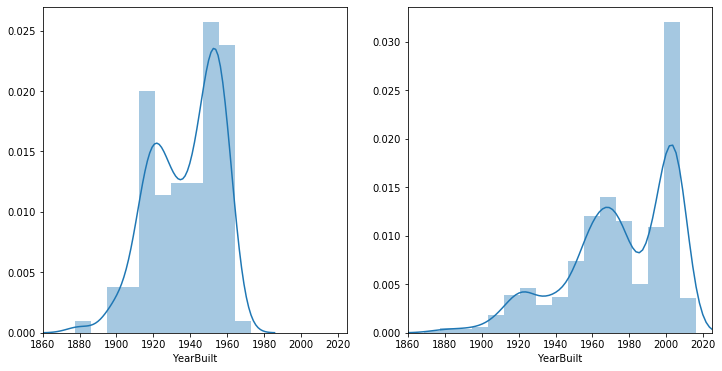

In [100]:
f = plt.figure(figsize=(12,6))

f.add_subplot(121)
sns.distplot(df[df.Electrical.isin(["FuseA", "FuseF"])].YearBuilt, bins=np.linspace(1860,2025,20))
plt.xlim(1860, 2025)
f.add_subplot(122)
sns.distplot(df[df.Electrical == "SBrkr"].YearBuilt, bins=np.linspace(1860,2025,20))
plt.xlim(1860, 2025)

Definitely a correlation there.  Let's just build a simple, hand-wavy function to convert NaNs in this area. Note that FuseA and FuseF seemed to occupy the same time period, and FusaA is more common, so we use that.  Also, FuseP and Mix are very rare, so we won't even bother.  It looks like FuseA disappears pretty rapidly around 1960, so use that as a cutoff year.

In [94]:
def year_built_to_electrical(year):
    if year > 1960:
        return "SBrkr"
    else:
        return "FuseA"

In [96]:
df["Electrical"] = df.apply(lambda row: year_built_to_electrical(row.YearBuilt) if pd.isnull(row.Electrical) else row.Electrical, axis=1)